In [1]:
#¿Existe relación entre los factores socioeconómicos y las tasas de suicidio, contagio de dengue y brotes de ETA en los departamentos de Bolívar, 
#Córdoba, Sucre y San Andrés?

#C:\\Users\\knives\\Desktop\\Devs\\Python\\BootCampUTB\\Proyecto\\DataBases\\
#df_fuente["estrato","SEXO","Departamento_ocurrencia","FEC_NOT","Municipio_ocurrencia","Nom_upgd","sem_ges","edad","ANO"]

In [28]:
# Paso 1: Conexión con la fuente de datos (Archivo en Excel)

#import dash
#import dash_core_components as dcc
#import dash_html_components as html
import plotly.express as px
import pandas as pd
import datetime

# Cargar los datos desde el archivo Excel
df_fuente = pd.read_excel('C:\\Users\\knives\\Desktop\\Devs\\Python\\BootCampUTB\\Proyecto\\DataBases\\Datos_2021_356.xlsx')
df = df_fuente

# Filtrar por los departamentos especificados
departamentos_filtrados = ['CORDOBA', 'SUCRE', 'BOLIVAR', 'SAN ANDRES']
df = df[df['Departamento_ocurrencia'].isin(departamentos_filtrados)]

# Mostrar los primeros registros del DataFrame para verificar
print(df.head())

         Partición  CONSECUTIVE  COD_EVE     FEC_NOT  SEMANA   ANO  \
5   Datos_2021_356      8713417      356  2021-02-25       8  2021   
8   Datos_2021_356      8717081      356  2021-04-01      13  2021   
29  Datos_2021_356      8260388      356  2021-11-06      44  2021   
45  Datos_2021_356      8260404      356  2021-10-23      41  2021   
59  Datos_2021_356      8260418      356  2021-06-20      25  2021   

       COD_PRE  COD_SUB  EDAD  UNI_MED  ...  \
5   1343000492        1    14        1  ...   
8   2306800238        1    30        1  ...   
29  1300102568        1    15        1  ...   
45  1300102568        1    33        1  ...   
59  2330000347        1    25        1  ...   

                               Nom_upgd Pais_ocurrencia        Nombre_evento  \
5   ESE HOSPITAL LA DIVINA MISERICORDIA        COLOMBIA  INTENTO DE SUICIDIO   
8                ESE HOSPITAL SAN JORGE        COLOMBIA  INTENTO DE SUICIDIO   
29              CLINICA LA MISERICORDIA        COLOMBIA 

In [54]:
# Función para convertir semana en fecha aproximada (primer día de la semana)
def semana_a_fecha(anio, semana):
    return datetime.datetime.strptime(f'{anio}-W{semana}-1', "%Y-W%U-%w").date()

# Aplicar la función al DataFrame y cargar la fecha aproximada
df['Fecha'] = df.apply(lambda row: semana_a_fecha(row['ANO'], row['SEMANA']), axis=1)

# Mostrar el DataFrame resultante
print(df)

            Partición  CONSECUTIVE  COD_EVE    FEC_NOT  SEMANA   ANO  \
0      Datos_2021_356      8717076      356 2021-11-24      47  2021   
1      Datos_2021_356      8717077      356 2021-07-03      26  2021   
2      Datos_2021_356      8717078      356 2021-10-21      42  2021   
3      Datos_2021_356      8713415      356 2021-11-04      44  2021   
4      Datos_2021_356      8713416      356 2021-08-25      34  2021   
...               ...          ...      ...        ...     ...   ...   
29787  Datos_2021_356      8879101      356 2021-07-29      30  2021   
29788  Datos_2021_356      8879102      356 2021-04-13      15  2021   
29789  Datos_2021_356      8879103      356 2021-11-12      45  2021   
29790  Datos_2021_356      8879104      356 2022-01-03      52  2021   
29791  Datos_2021_356      8879105      356 2021-04-19      16  2021   

          COD_PRE  COD_SUB  EDAD  UNI_MED  ...  Municipio_ocurrencia  \
0      1100105668        1    12        1  ...                B

In [58]:
# Convertir la columna de fechas a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer el año y el mes en nuevas columnas
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.strftime('%B')
df['Sexo'] = df['SEXO']

print(df)

            Partición  CONSECUTIVE  COD_EVE    FEC_NOT  SEMANA   ANO  \
0      Datos_2021_356      8717076      356 2021-11-24      47  2021   
1      Datos_2021_356      8717077      356 2021-07-03      26  2021   
2      Datos_2021_356      8717078      356 2021-10-21      42  2021   
3      Datos_2021_356      8713415      356 2021-11-04      44  2021   
4      Datos_2021_356      8713416      356 2021-08-25      34  2021   
...               ...          ...      ...        ...     ...   ...   
29787  Datos_2021_356      8879101      356 2021-07-29      30  2021   
29788  Datos_2021_356      8879102      356 2021-04-13      15  2021   
29789  Datos_2021_356      8879103      356 2021-11-12      45  2021   
29790  Datos_2021_356      8879104      356 2022-01-03      52  2021   
29791  Datos_2021_356      8879105      356 2021-04-19      16  2021   

          COD_PRE  COD_SUB  EDAD  UNI_MED  ...  Municipio_ocurrencia  \
0      1100105668        1    12        1  ...                B

C:\Users\knives\AppData\Local\Temp\ipykernel_11720\3303172133.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\knives\AppData\Local\Temp\ipykernel_11720\3303172133.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\knives\AppData\Local\Temp\ipykernel_11720\3303172133.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

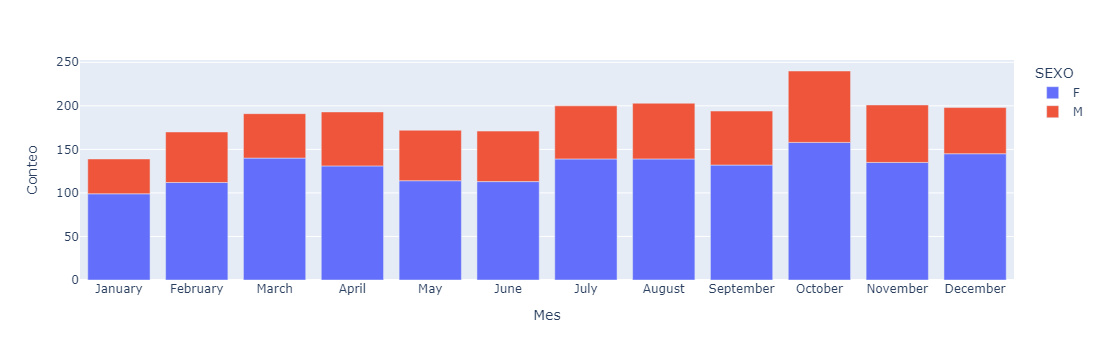

In [19]:
# Agrupar por Mes y Sexo y contar los registros
df_grouped = df.groupby(['Mes', 'SEXO']).size().reset_index(name='Conteo')

# Ordenar los meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_grouped['Mes'] = pd.Categorical(df_grouped['Mes'], categories=meses_ordenados, ordered=True)
df_grouped = df_grouped.sort_values('Mes')

# Crear el gráfico de líneas
fig = px.bar(df_grouped, x='Mes', y='Conteo', color='SEXO', title='')

# Mostrar el gráfico

fig.show()

In [23]:




# Supongamos que tienes el año y el número de semana
anio = 2023
semana = 50

# Encontrar el primer día de la semana
primer_dia_semana = datetime.datetime.strptime(f'{anio}-W{semana}-1', "%Y-W%U-%w").date()

# Mostrar la fecha correspondiente
print(primer_dia_semana)


2023-12-11
